In [ ]:
# Abdülhalim YAYDEMİR

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

'''
F=100
T=1/F
t=np.arange(0.,2*T,0.0001)
x=5*np.cos(200*np.pi*t)
plt.xlabel("t")
plt.title("x(t)=5*cos(200*pi*t)")
plt.plot(t,x)
plt.show()
#######################

Fs=2200
Ts=1/Fs
N=22
n=np.arange(0.,2*N)
xn=5*np.cos(200*np.pi*n*Ts)
plt.stem(n,xn)
plt.title("x[n]")
plt.xlabel("örnek")
plt.ylabel("x[n]")
plt.show()

#######################
t=np.arange(0.,2/60,1/4000)
xt_1=np.cos(2*np.pi*60*t+np.pi/3)
xt_2=np.cos(2*np.pi*340*t-np.pi/3)
xt_3=np.cos(2*np.pi*460*t+np.pi/3)
Fs=400
Ts=1/Fs
nTs=np.arange(0.,2/60,Ts)
xnTs_1=np.cos(2*np.pi*60*nTs+np.pi/3)
xnTs_2=np.cos(2*np.pi*340*nTs-np.pi/3)
xnTs_3=np.cos(2*np.pi*460*nTs+np.pi/3)
plt.subplot(3,1,2)
plt.xlabel("t")
plt.ylabel("x_2(t) için")
plt.plot(t,xt_2,color='orange')
plt.stem(nTs,xnTs_2)
plt.hold()

plt.subplot(3,1,3)
plt.xlabel("t")
plt.ylabel("x_3(t) için")
plt.plot(t,xt_3,color='orange')
plt.stem(nTs,xnTs_3)
plt.hold()
plt.show()
#########################3
def signall(Fs,N,k):
    F=100
    T=1/F
    t=np.linspace(-k*T/2,k*T/2,1000)
    xt=np.sinc(2*F*t)**2
    Ts=1/Fs
    n=np.arange(-N/2,N/2)
    xn=np.sinc(2*F*n*Ts)**2
    w=np.arange(-np.pi,np.pi,2*np.pi/N)
    xw=np.fft.fftshift(np.fft.fft(xn,N)/N)
    
    plt.figure()
    plt.subplot(1,3,1)
    plt.plot(t,xt)
    plt.xlabel("t (sn)")
    plt.title("$x(t)$")

    plt.subplot(1,3,2)
    plt.stem(n,xn)
    plt.xlabel("n (örnek)")
    plt.title("$x[n]$")
    
    plt.subplot(1,3,3)
    plt.stem(w/np.pi,abs(xw))
    plt.xlabel("$\omega$ / $\pi$")
    plt.title("$X(\omega)$ (Genlik)")
    plt.show()
    
    signall(1000,30,3)
    signall(600,30,5)
    signall(300,30,10)
    signall(100,30,30)
    
###################################
    
    Fs=2200
    Ts=1/Fs
    N=22
    n=np.arange(0.,2*N)
    xn=5*np.cos(200*np.pi*n*Ts)
    
    plt.stem(n,xn)
    plt.title("x[n]")
    plt.xlabel("örnek")
    plt.ylabel("x[n]")
    plt.show()
    
    w=np.linspace(-np.pi,np.pi-(2*np.pi/N),N)
    x_w=np.fft.fft(xn,N)/N
    x_w=np.fft.fftshift(x_w)
    
    plt.figure()
    plt.stem(w,np.abs(x_w))
    plt.title("X(w)'nın Genlik Grafiği")
    plt.xlabel("w")
    plt.show()
    plt.figure()
    plt.stem(w,np.angle(x_w))
    plt.title("X(w)'nın Faz Grafiği")
    plt.xlabel("w")
    plt.show()
    
    
#########################################

    F=100
    T=1/F
    k=4
    t=np.arange(0.,k*T,0.002/22)
    x=5*np.cos(200*np.pi*t)
    
    plt.figure()
    plt.xlabel("t")
    plt.title("x(t)=5*cos(200*pi*t)")
    plt.plot(t,x)
    plot.show()
    
    Fs=2200
    Ts=1/Fs
    N=22
    n=np.arange(0,k*N)
    xn=5*np.cos(200*np.pi*n*Ts)
    
    plt.figure()
    plt.stem(n,xn)
    plt.title("x[n]")
    plt.xlabel("örnek")
    plt.ylabel("x[n]")
    plt.show()
    
    x_sinc=np.zeros([k*N,np.size(x,axis=0)])
    plt.figure()
    for ni in n:
        x_sinc[ni,:]=xn[ni]*np.sinc((t-(ni)*Ts)/Ts)
        plt.plot(x_sinc[ni,:])
        
    plt.title("işaretin zaman domaininde sinc(.) ile konvolüsyon işlemi")
    plt.xlabel("örnek")
    plt.show()
    
    xr_t = np.sum(x_sinc, axis=0)
    plt.figure()
    plt.xlabel("t")
    plt.title("x_r(t)")
    plt.plot(t,xr_t)
    plt.show()
    
##########################################
    
    F=100
    T=1/F
    k=2
    t=np.arange(0.,k*T,0.00001)
    x=5*np.cos(200*np.pi*t)
    
    plt.figure()
    plt.xlabel("t")
    plt.title("x(t)")
    plt.plot(t,x)
    plt.show()
    
    Fs=2200
    Ts=1/Fs
    N=22
    n=np.arange(0.,k*N)
    xn=5*np.cos(200*np.pi*n*Ts)
    
    def quantize(x,S):
        X=x.reshape((-1,1))
        S=S.reshape((1,-1))
        dists = abs(X-S)
        nearestIndex = dists.argmin(axis=1)
        quantized = S.flat[nearestIndex]
        
        return quantized.reshape(x.shape)
    
    k_bit=2
    Max_range=np.amax(xn)-np.amin(xn)
    q=pow(2,k_bit)
    delta=Max_range/q
    S_midrise=-np.amax(xn) + delta/2 + np.arange(q)*delta
    S_midtread= -np.amax(xn) + np.arange(q)*delta
    y_midtrise= quantize(xn, S_midrise)
    y_midtread=quantize(xn,S_midtread)
    
    plt.figure()
    fig,ax = plt.subplots()
    ax.stem(n,xn)
    ax.bar(n,y_midtrise, color='orange',edgecolor="darkorange")
    plt.xlabel("örnek")
    plt.title('midrise yöntemiyle kuantalanmış işaret')
    
    fig, ax = plt.subplots()
    ax.stem(n,xn)
    ax.bar(n,y_midtread,color='orange', edgecolor="darkorange")
    plt.xlabel("örnek")
    plt.title("midtread yöntemiyle kuantalanmış işaret")
    plt.show()
    

'''    
    
    
    
    

### SORU-1

## a)

<IPython.core.display.Javascript object>


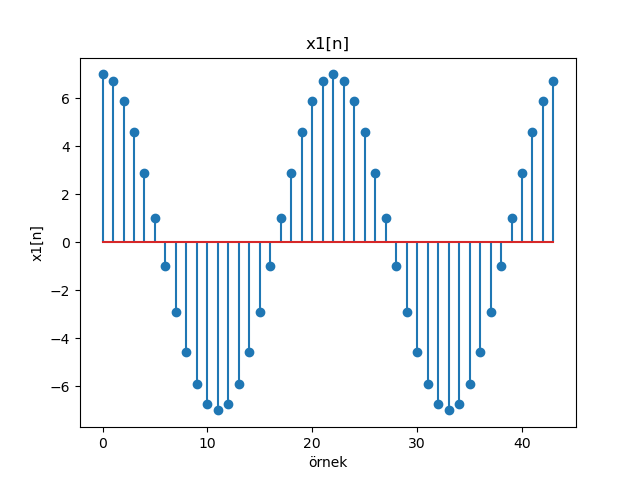

<IPython.core.display.Javascript object>


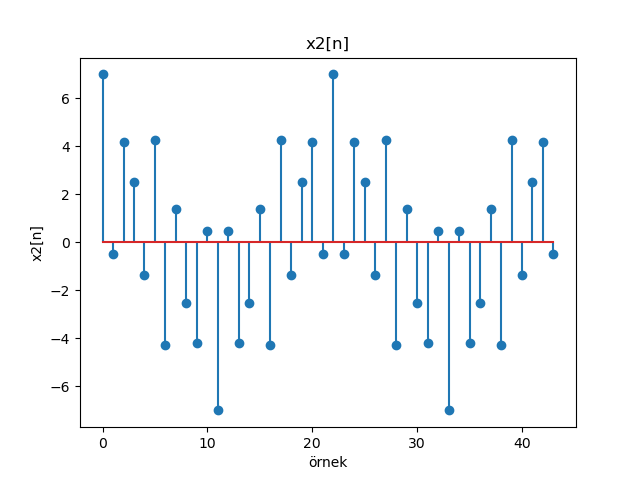

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

Fs=2200
Ts=1/Fs
N=22
n=np.arange(0.,2*N)
xn1=7*np.cos(200*np.pi*n*Ts)
xn2=3*np.cos(200*np.pi*n*Ts)+4*np.cos(1800*np.pi*n*Ts)

plt.figure()
plt.stem(n,xn1)
plt.title("x1[n]")
plt.xlabel("örnek")
plt.ylabel("x1[n]")
plt.show()

plt.figure()
plt.stem(n,xn2)
plt.title("x2[n]")
plt.xlabel("örnek")
plt.ylabel("x2[n]")
plt.show()




### max ve min değerleri aynı periyotlar aynı ama her değer aynı değil  çünkü ikincisi farklı bir işaret

## b)

<IPython.core.display.Javascript object>


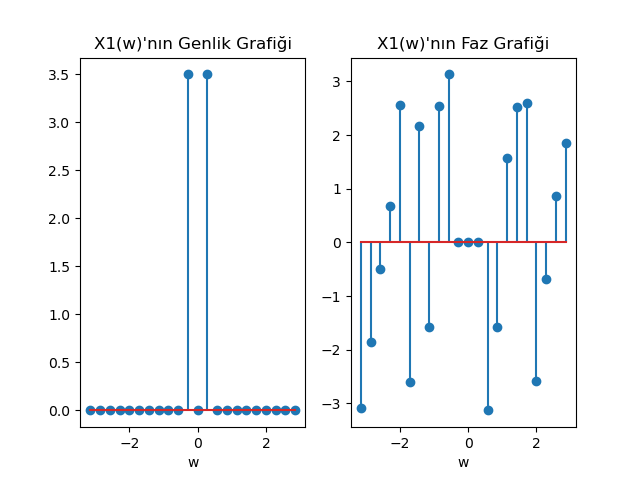

<IPython.core.display.Javascript object>


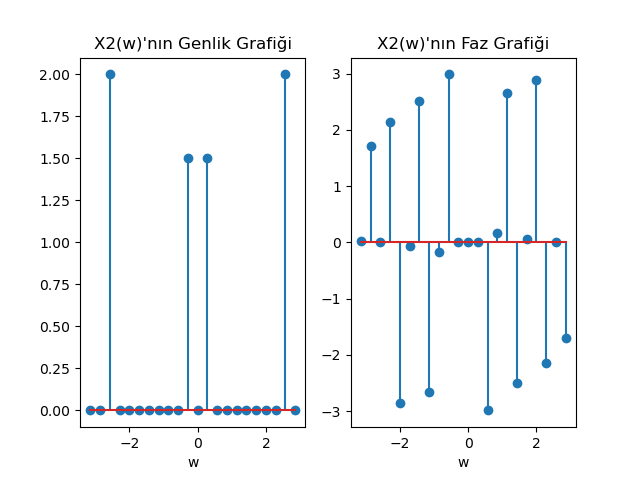

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import scipy.signal as sig
from scipy.fftpack import fft, ifft




Fs=2200
Ts=1/Fs
N=22
n=np.arange(0.,2*N)
xn1=7*np.cos(200*np.pi*n*Ts)
xn2=3*np.cos(200*np.pi*n*Ts)+4*np.cos(1800*np.pi*n*Ts)

w=np.linspace(-np.pi,np.pi-(2*np.pi/N),N)
x_w1=np.fft.fft(xn1,N)/N
x_w1=np.fft.fftshift(x_w1)
    
plt.figure()
plt.subplot(1,2,1)
plt.stem(w,np.abs(x_w1))
plt.title("X1(w)'nın Genlik Grafiği")
plt.xlabel("w")
plt.show()

plt.subplot(1,2,2)
plt.stem(w,np.angle(x_w1))
plt.title("X1(w)'nın Faz Grafiği")
plt.xlabel("w")
plt.show()
    

x_w2=np.fft.fft(xn2,N)/N
x_w2=np.fft.fftshift(x_w2)
    
plt.figure()
plt.subplot(1,2,1)
plt.stem(w,np.abs(x_w2))
plt.title("X2(w)'nın Genlik Grafiği")
plt.xlabel("w")
plt.show()

plt.subplot(1,2,2)
plt.stem(w,np.angle(x_w2))
plt.title("X2(w)'nın Faz Grafiği")
plt.xlabel("w")
plt.show()








    
    
    
    

### İki işaret farklı oldugunda fourier transformlarıda farklı

## c)

#### 1. işaret, w= -0.286 ve +0.286 da 3.5 değeri alıyor ve bu frekanslarda fazı yok.
#### Q=wFs=-+0.286*2200 , Q=2piF , F=-+100 Hz
### x1(t)=7cos(2pi100t)   Doğru elde  ettik Nyquist şartı sağlandığından dolayı.

#### 2. işaret, w= -2.57 ve +2.57 da 2 değeri alıyor ve bu frekanslarda fazı yok.
#### Q=wFs=-+2.57*2200 , Q=2piF,   F=-+900 Hz
#### w= -0.286 ve +0.286 da 1.5 değeri alıyor ve bu frekanslarda fazı yok.
#### Q=wFs=-+0.286*2200 , Q=2piF , F=-+100 Hz
### x2(t)=3cos(2pi100t) + 4cos(2pi900t)   Doğru elde  ettik Nyquist şartı sağlandığından dolayı.